In [10]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_index

# 데이터 로드
spotify_df = pd.read_csv('Spotify-2000.csv')

# 1. 데이터 전처리
# 수치형 특성 선택
numeric_features = [
    'Beats Per Minute (BPM)',
    'Energy',
    'Danceability',
    'Loudness (dB)',
    'Liveness',
    'Valence',
    'Acousticness',
    'Speechiness'
]

# 결측값 처리
X = spotify_df[numeric_features].dropna()

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

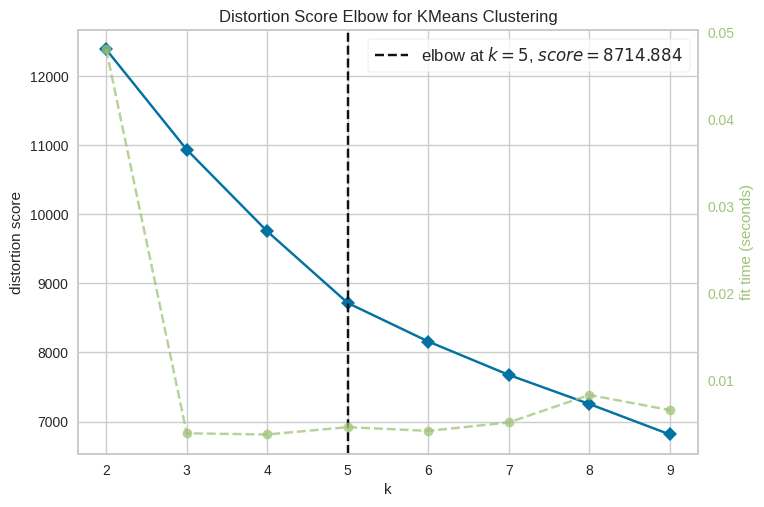

최적의 클러스터 수: 5


In [12]:

# 2. KMeans 클러스터링
# 엘보우 메서드 사용
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#엘보우 메서드 시각화
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)
visualizer.show()

# 최적의 클러스터 수 선택
optimal_clusters = visualizer.elbow_value_
print(f'최적의 클러스터 수: {optimal_clusters}')



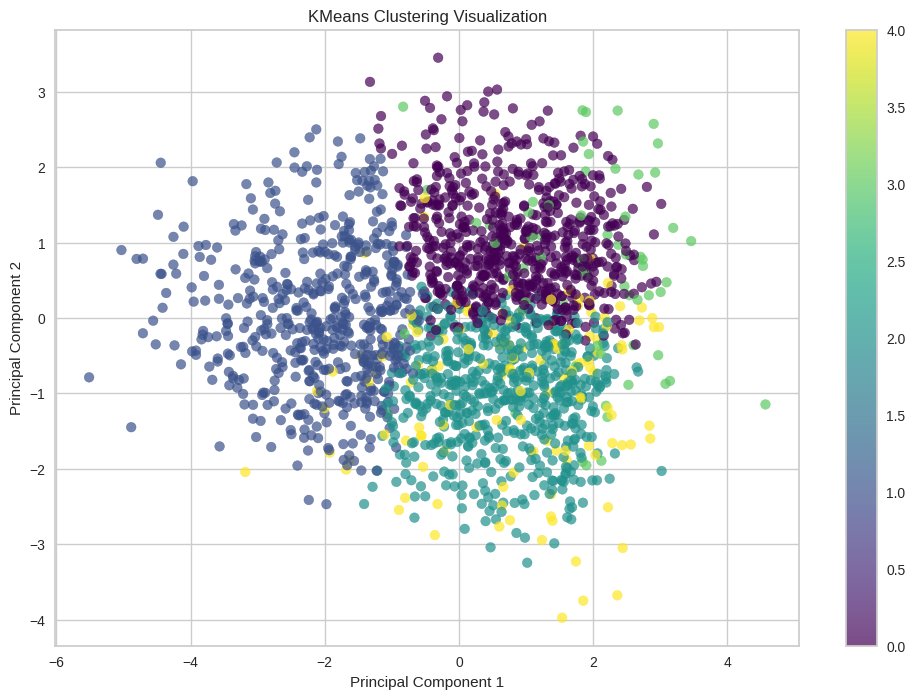

In [13]:
# 3. KMeans 클러스터링
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# PCA 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Kmeans 클러스터링 시각화
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [17]:
# 4. 클러스터링 성능 지표
# 실루엣ㅅ 스코어
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.4f}')

# 클러스터별 특성 분석
cluster_summary = spotify_df.copy()
cluster_summary['Cluster'] = kmeans_labels

# 클러스터별 평균 특성
cluster_means = cluster_summary.groupby('Cluster')[numeric_features].mean()
print('클러스터별 평균 특성:')
print(cluster_means)

KMeans Silhouette Score: 0.2019
클러스터별 평균 특성:
         Beats Per Minute (BPM)     Energy  Danceability  Loudness (dB)  \
Cluster                                                                   
0                    116.150915  67.367378     65.675305      -8.658537   
1                    113.443038  33.200723     46.947559     -12.206148   
2                    130.644670  72.576988     44.940778      -6.786802   
3                    127.596774  70.903226     65.435484      -7.209677   
4                    118.628788  69.386364     49.204545      -8.143939   

          Liveness    Valence  Acousticness  Speechiness  
Cluster                                                   
0        14.798780  72.772866     20.280488     4.353659  
1        14.162749  31.052441     60.726944     3.645570  
2        17.099831  37.844332     10.015228     4.749577  
3        19.000000  62.822581     18.870968    24.500000  
4        68.833333  55.674242     27.030303     5.772727  


특성별 기술통계:
       Beats Per Minute (BPM)       Energy  Danceability  Loudness (dB)  \
count             1994.000000  1994.000000   1994.000000    1994.000000   
mean               120.215647    59.679539     53.238215      -9.008526   
std                 28.028096    22.154322     15.351507       3.647876   
min                 37.000000     3.000000     10.000000     -27.000000   
25%                 99.000000    42.000000     43.000000     -11.000000   
50%                119.000000    61.000000     53.000000      -8.000000   
75%                136.000000    78.000000     64.000000      -6.000000   
max                206.000000   100.000000     96.000000      -2.000000   

          Liveness      Valence  Acousticness  Speechiness  
count  1994.000000  1994.000000   1994.000000  1994.000000  
mean     19.012036    49.408726     28.858074     4.994985  
std      16.727378    24.858212     29.011986     4.401566  
min       2.000000     3.000000      0.000000     2.000000  
25%      

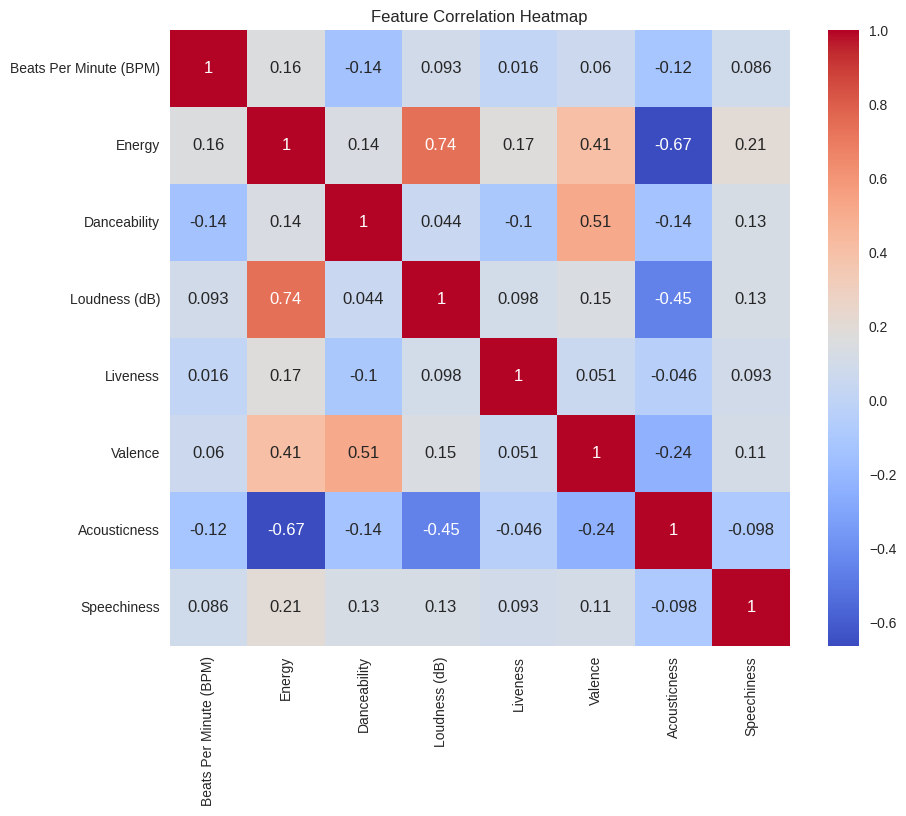

In [21]:
# 데이터 분포 확인
print("특성별 기술통계:")
print(X.describe())

# 특성 간 상관관계 확인
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

eps: 1.0481, min_samples: 4, Clusters: 9, Silhouette: -0.1073, Noise Ratio: 28.54%
eps: 1.0481, min_samples: 5, Clusters: 5, Silhouette: -0.0703, Noise Ratio: 31.90%
eps: 1.0481, min_samples: 6, Clusters: 6, Silhouette: -0.2262, Noise Ratio: 35.86%
eps: 1.0481, min_samples: 7, Clusters: 2, Silhouette: 0.0910, Noise Ratio: 40.02%
eps: 1.0481, min_samples: 9, Clusters: 2, Silhouette: 0.0636, Noise Ratio: 45.09%
eps: 1.0481, min_samples: 10, Clusters: 3, Silhouette: 0.0342, Noise Ratio: 47.29%
eps: 1.2068, min_samples: 3, Clusters: 5, Silhouette: -0.1584, Noise Ratio: 16.15%
eps: 1.2068, min_samples: 4, Clusters: 3, Silhouette: 0.1275, Noise Ratio: 17.65%
eps: 1.2068, min_samples: 7, Clusters: 2, Silhouette: 0.2475, Noise Ratio: 22.37%
eps: 1.2068, min_samples: 8, Clusters: 2, Silhouette: 0.2551, Noise Ratio: 23.57%
eps: 1.3895, min_samples: 3, Clusters: 8, Silhouette: 0.0210, Noise Ratio: 8.32%
eps: 1.3895, min_samples: 4, Clusters: 2, Silhouette: 0.1817, Noise Ratio: 10.28%
eps: 1.3895,

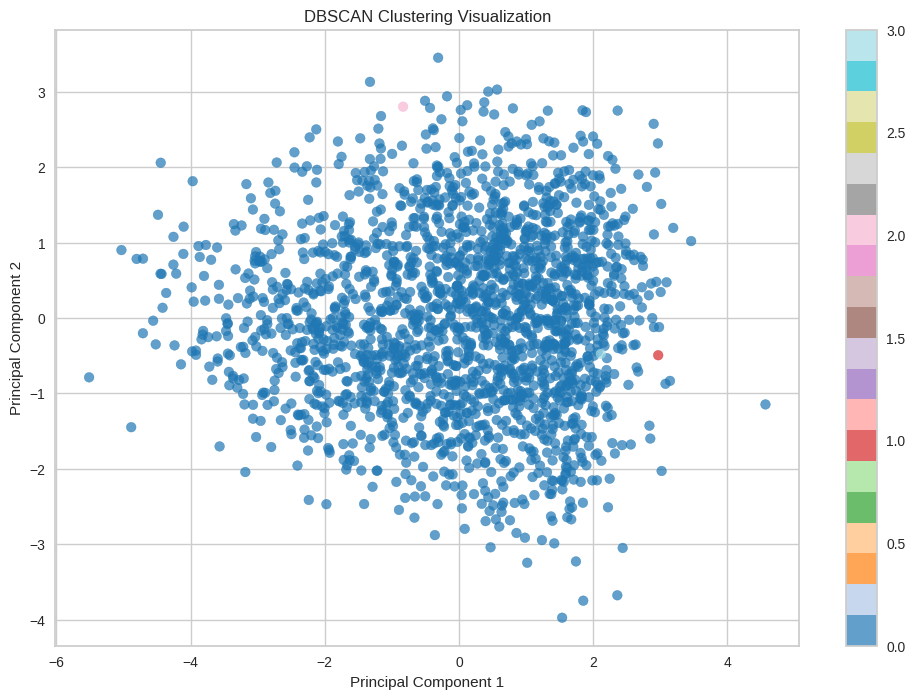


클러스터 특성:

Cluster 0:
Size: 1991
Mean Features:
Beats Per Minute (BPM)    120.247614
Energy                     59.676042
Danceability               53.232546
Loudness (dB)              -9.006027
Liveness                   19.010547
Valence                    49.428428
Acousticness               28.850829
Speechiness                 4.931190
dtype: float64

Cluster 1:
Size: 1
Mean Features:
Beats Per Minute (BPM)    120.0
Energy                     85.0
Danceability               60.0
Loudness (dB)              -5.0
Liveness                   12.0
Valence                    15.0
Acousticness                2.0
Speechiness                46.0
dtype: float64

Cluster 2:
Size: 1
Mean Features:
Beats Per Minute (BPM)    87.0
Energy                    11.0
Danceability              70.0
Loudness (dB)            -15.0
Liveness                   7.0
Valence                   52.0
Acousticness              94.0
Speechiness               55.0
dtype: float64

Cluster 3:
Size: 1
Mean Features:
Be

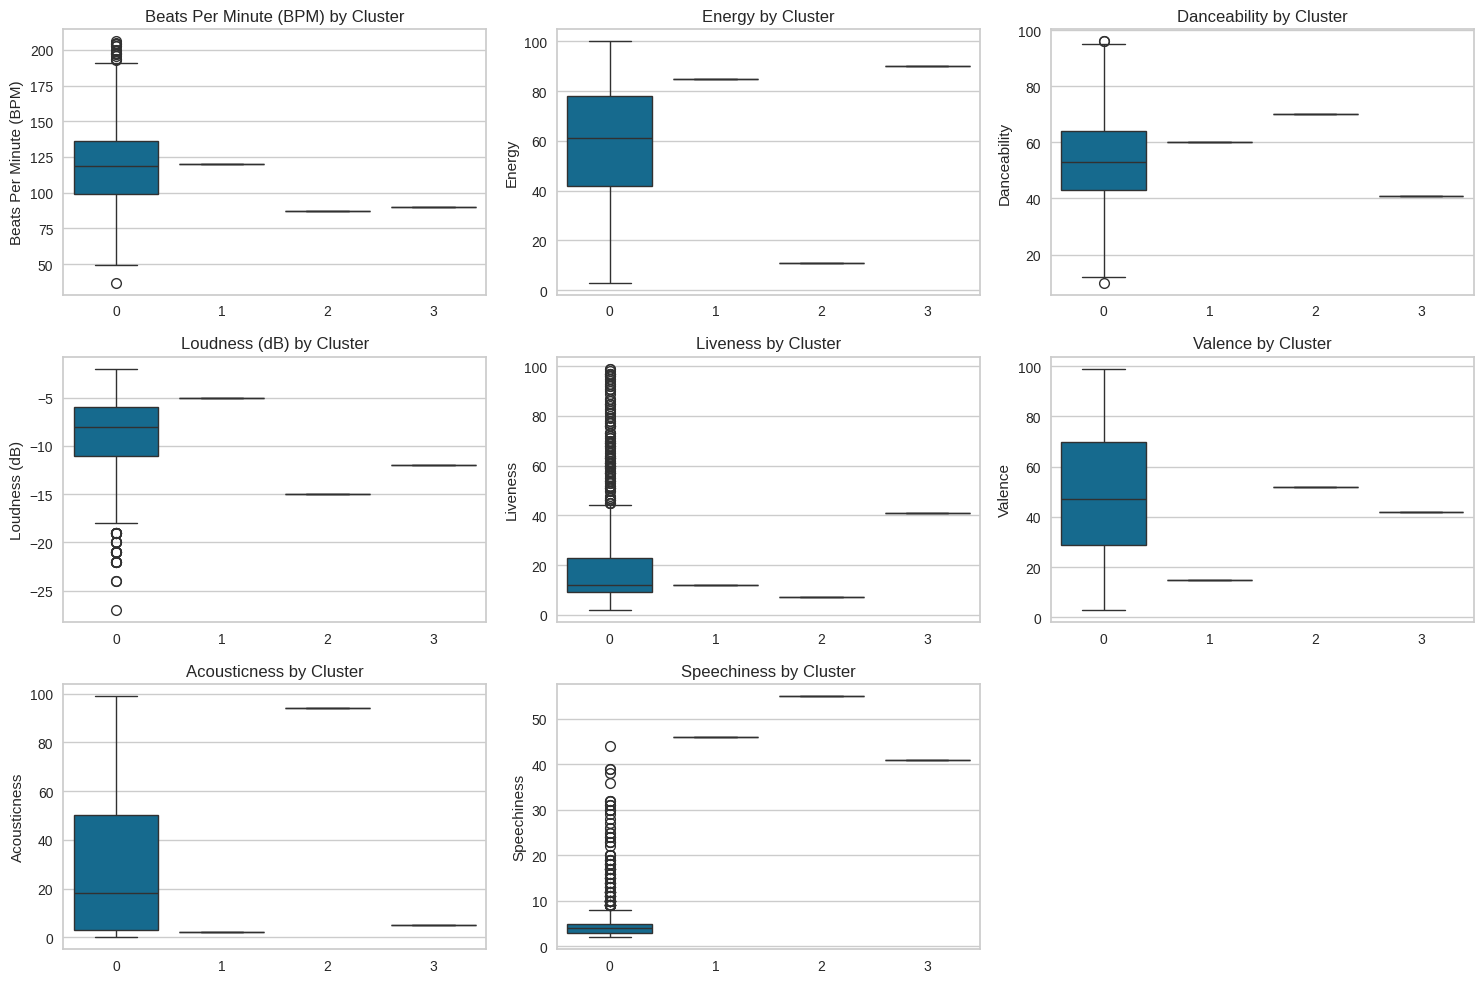

In [22]:
# 고급 DBSCAN 최적화 함수
def advanced_dbscan_optimization(X_scaled):
    # 더 넓은 탐색 범위와 세부 전략
    eps_range = np.logspace(-2, 1, 50)  # 로그 스케일 탐색
    min_samples_range = range(1, 30)

    best_results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            try:
                # DBSCAN 클러스터링
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X_scaled)

                # 노이즈 포인트 제외
                mask = labels != -1

                # 클러스터 분석
                unique_labels = np.unique(labels[mask])
                n_clusters = len(unique_labels)

                # 클러스터링 조건
                if 2 <= n_clusters <= 10 and np.sum(mask) > len(X_scaled) * 0.5:
                    # 실루엣 스코어 계산
                    silhouette = silhouette_score(X_scaled[mask], labels[mask])
                    noise_ratio = np.mean(labels == -1) * 100

                    best_results.append({
                        'eps': eps,
                        'min_samples': min_samples,
                        'n_clusters': n_clusters,
                        'silhouette': silhouette,
                        'noise_ratio': noise_ratio,
                        'labels': labels
                    })

                    print(f"eps: {eps:.4f}, min_samples: {min_samples}, "
                          f"Clusters: {n_clusters}, "
                          f"Silhouette: {silhouette:.4f}, "
                          f"Noise Ratio: {noise_ratio:.2f}%")

            except Exception as e:
                continue

    # 결과 정렬 및 최적 파라미터 선택
    if best_results:
        # 다중 기준 정렬 (실루엣 스코어 최대, 노이즈 비율 최소)
        best_result = max(best_results,
                          key=lambda x: (x['silhouette'], -x['noise_ratio']))

        return (best_result['eps'], best_result['min_samples']), \
               best_result['labels'], \
               best_result['silhouette']

    return None, None, None

# 최적 DBSCAN 파라미터 탐색
best_params, best_labels, best_silhouette = advanced_dbscan_optimization(X_scaled)

# 결과 시각화 및 분석
if best_params:
    print("\n최적 DBSCAN 파라미터:")
    print(f"eps: {best_params[0]:.4f}")
    print(f"min_samples: {best_params[1]}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}")

    # 클러스터 분포 확인
    unique_labels, counts = np.unique(best_labels, return_counts=True)
    print("\n클러스터 분포:")
    for label, count in zip(unique_labels, counts):
        print(f"Label {label}: {count} 개")

    # PCA 시각화
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=best_labels,
        cmap='tab20',
        alpha=0.7
    )
    plt.colorbar(scatter)
    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # 클러스터별 특성 분석
    cluster_analysis = []
    for label in unique_labels:
        if label != -1:
            cluster_data = X[best_labels == label]
            cluster_mean = cluster_data.mean()
            cluster_analysis.append({
                'label': label,
                'size': len(cluster_data),
                'mean_features': cluster_mean
            })

    # 클러스터 특성 출력
    print("\n클러스터 특성:")
    for cluster in cluster_analysis:
        print(f"\nCluster {cluster['label']}:")
        print(f"Size: {cluster['size']}")
        print("Mean Features:")
        print(cluster['mean_features'])

else:
    print("최적 클러스터링 파라미터를 찾을 수 없습니다.")

# 추가 시각화: 특성별 분포 비교
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=best_labels, y=X[feature])
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()